# Obesity Predictor Model


## Question and Background Information


Question: Can we predict obesity level for individuals in Mexico, Peru and Colombia based on an individual’s family history with being overweight, their consumption of high caloric foods, frequency of consumption of vegetables, physical activity frequency, and time using technology devices?


Background Information: Obesity is a prominent issue in many countries. We wanted to focus on the countries of Mexico, Peru, and Colombia in search of predicting obesity based on factors specific to developing countries. The dataset we chose has 17 different attributes based on eating habits and physical condition. We have data on individuals ranging from 14 to 61 years old and a multitude of health conditions so the model would have to be able to form predictions considering the variance of the attributes. Using decision trees, we may be able to find patterns between specific variables and discern correlations to explain obesity trends in developing countries. For example, the ML model can read into family history and overall demographic which could potentially be used by researchers studying genetic factors relating to physical habits and obesity. Creating a machine learning model that can predict obesity levels can be used for understanding which factors are most relevant to address when addressing the obesity challenge. 


## Exploratory Data Analysis


In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
obesity = pd.read_csv('ObesityDataSet.csv')


In [4]:
obesity.info()
obesity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
obesity.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Collapse the NObeyesdad variable 


In [6]:
underweight = ['Insufficient_Weight']
normal = ['Normal_Weight']
overweight = ['Overweight_Level_I', 'Overweight_Level_II']
obese = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Function to categorize weight
def categorize_weight(row):
    if row in underweight:
        return 'underweight'
    elif row in normal:
        return 'normal'
    elif row in overweight:
        return 'overweight'
    elif row in obese:
        return 'obese'
    
# Apply the function to create a new column
obesity['weight_category'] = obesity['NObeyesdad'].apply(categorize_weight)

obesity
obesity.weight_category.value_counts()


weight_category
obese          972
overweight     580
normal         287
underweight    272
Name: count, dtype: int64

Now, we convert the appropriate columns to factors


In [7]:
obesity.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
weight_category                    object
dtype: object

In [8]:
cat = obesity.select_dtypes(include=['object']).columns.tolist()
obesity[cat] = obesity[cat].astype('category')
obesity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   FAVC                            2111 non-null   category
 6   FCVC                            2111 non-null   float64 
 7   NCP                             2111 non-null   float64 
 8   CAEC                            2111 non-null   category
 9   SMOKE                           2111 non-null   category
 10  CH2O                            2111 non-null   float64 
 11  SCC                             2111 non-null   category
 12  FAF                 

Check for missing data


In [9]:
import seaborn as sns
sns.displot(
    data=obesity.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

Next, we normalize the numeric variables.



In [10]:
numeric_cols = obesity.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [11]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(obesity[numeric_cols])   # conduct data transformation
scaled_df = pd.DataFrame(d, columns=numeric_cols)   # convert back to pd df; transformation converts to array
obesity[numeric_cols] = scaled_df   # put data back into the main df

In [12]:
obesity.describe()  

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.219417,0.474863,0.355120,0.709522,0.561876,0.504006,0.336766,0.328933
std,0.135021,0.176047,0.195457,0.266963,0.259346,0.306477,0.283531,0.304464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.126536,0.339623,0.197562,0.500000,0.552913,0.292406,0.041502,0.000000
50%,0.186764,0.472640,0.328358,0.692751,0.666667,0.500000,0.333333,0.312675
75%,0.255319,0.600875,0.510677,1.000000,0.666667,0.738710,0.555559,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now, we onehot encode the data (process of converting categorical variables to a usable form for a machine learning algorithm)

In [13]:
cat_cols = obesity.select_dtypes(include='category').columns
print(cat_cols)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad', 'weight_category'],
      dtype='object')


In [14]:
encoded = pd.get_dummies(obesity[cat_cols])
encoded.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,weight_category_normal,weight_category_obese,weight_category_overweight,weight_category_underweight
0,True,False,False,True,True,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
1,True,False,False,True,True,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,False,True,False,True,True,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
3,False,True,True,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
4,False,True,True,False,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [15]:
encoded = encoded.astype(int)

encoded.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,weight_category_normal,weight_category_obese,weight_category_overweight,weight_category_underweight
0,1,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [16]:
encoded.to_csv('encoded_data.csv', index=False)


In [17]:
obesity = obesity.drop(cat_cols, axis=1)


In [18]:
obesity = obesity.join(encoded)


In [19]:
obesity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   int64  
 9   Gender_Male                         2111 non-null   int64  
 10  family_history_with_overweight_no   2111 non-null   int64  
 11  family_history_with_overweight_yes  2111 no

In [20]:
obesity

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,weight_category_normal,weight_category_obese,weight_category_overweight,weight_category_underweight
0,0.148936,0.320755,0.186567,0.5,0.666667,0.500000,0.000000,0.500000,1,0,...,1,0,0,0,0,0,1,0,0,0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.000000,1.000000,0.000000,1,0,...,1,0,0,0,0,0,1,0,0,0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.500000,0.666667,0.500000,0,1,...,1,0,0,0,0,0,1,0,0,0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.500000,0.666667,0.000000,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.500000,0.000000,0.000000,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.148443,0.491943,0.689616,1.0,0.666667,0.364070,0.558756,0.453124,1,0,...,0,0,0,1,0,0,0,1,0,0
2107,0.169850,0.563366,0.707037,1.0,0.666667,0.502565,0.447130,0.299635,1,0,...,0,0,0,1,0,0,0,1,0,0
2108,0.181362,0.570200,0.706637,1.0,0.666667,0.527097,0.471403,0.323144,1,0,...,0,0,0,1,0,0,0,1,0,0
2109,0.220467,0.546132,0.704079,1.0,0.666667,0.926170,0.379702,0.293017,1,0,...,0,0,0,1,0,0,0,1,0,0


## Methods

Check the prevalence of the target class

In [21]:
obesity['weight_category_overweight'].value_counts()[1] / obesity['weight_category_overweight'].count()


0.2747513027001421

In [22]:
X = obesity[["family_history_with_overweight_yes","FAVC_yes","FCVC", "FAF", "TUE"]]
y = obesity['weight_category_overweight'] 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, stratify = y, random_state=21)


In [24]:
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50, stratify = y_test,random_state=49)


In [25]:
obesity_3NN = KNeighborsClassifier(n_neighbors=9)


In [26]:
obesity_3NN.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [27]:
# Probability that our model predicted the correct output based on given inputs

obesity_3NN.score(X_tune, y_tune) 


0.7630331753554502

## Evaluation of model


In [28]:
obesity_prob1 = obesity_3NN.predict_proba(X_tune) #This function gives percent probability for both class (0,1)
obesity_prob1[:5] 

array([[1.        , 0.        ],
       [0.55555556, 0.44444444],
       [0.88888889, 0.11111111],
       [0.77777778, 0.22222222],
       [1.        , 0.        ]])

In [29]:
obesity_pred1 = obesity_3NN.predict(X_tune)
obesity_pred1[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [30]:
final_model= pd.DataFrame({'neg_prob':obesity_prob1[:, 0], 'pred':obesity_pred1,'target':y_tune, 'pos_prob':obesity_prob1[:, 1]})


In [31]:
final_model.head()

,neg_prob,pred,target,pos_prob
577,1.000000,0,0,0.000000
995,0.555556,0,1,0.444444
464,0.888889,0,0,0.111111
954,0.777778,0,1,0.222222
1352,1.000000,0,0,0.000000


In [54]:
metrics.confusion_matrix(final_model.target,final_model.pred)

array([[140,  13],
       [ 37,  21]])

In [55]:
metrics.ConfusionMatrixDisplay.from_predictions(final_model.target,final_model.pred, display_labels = [False, True])

In [39]:
# Function so we can make the threshold whatever we want, not just the default 50%
def adjust_thres(x,y,z):
  #x=pred_probablities, y=threshold, z=test_outcome
  thres = (np.where(x > y, 1,0))
  #np.where is essentially a condensed if else statement. The first argument is the condition, then the true output, then the false output
  return metrics.ConfusionMatrixDisplay.from_predictions(z,thres, display_labels = [False, True], colorbar=False)


In [52]:
# With a threshold of .35
adjust_thres(final_model.pos_prob,.35,final_model.target)


In [53]:
#Now let's use our model to obtain an ROC Curve and the AUC
metrics.RocCurveDisplay.from_predictions(final_model.target, final_model.pos_prob)
#Set labels and midline...
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

In [42]:
# Let's extract the specific AUC value now
metrics.roc_auc_score(final_model.target, final_model.pos_prob) 

0.7418864097363083

In [43]:
# Determine the log loss
metrics.log_loss(final_model.target, final_model.pos_prob)

0.505966230602663

In [44]:
# Get the F1 Score
metrics.f1_score(final_model.target, final_model.pred)

0.4565217391304348

In [45]:
# Other evaluation metrics
print(metrics.classification_report(final_model.target, final_model.pred)) 

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       153
           1       0.62      0.36      0.46        58

    accuracy                           0.76       211
   macro avg       0.70      0.64      0.65       211
weighted avg       0.74      0.76      0.74       211



## Decision Tree

In [46]:
obesity.weight_category_obese.value_counts()

weight_category_obese
0    1139
1     972
Name: count, dtype: int64

In [239]:
obesity_dt = obesity.copy()

In [237]:
obesity_dt

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,weight_category_normal,weight_category_obese,weight_category_overweight,weight_category_underweight
0,0.148936,0.320755,0.186567,0.5,0.666667,0.500000,0.000000,0.500000,1,0,...,1,0,0,0,0,0,1,0,0,0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.000000,1.000000,0.000000,1,0,...,1,0,0,0,0,0,1,0,0,0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.500000,0.666667,0.500000,0,1,...,1,0,0,0,0,0,1,0,0,0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.500000,0.666667,0.000000,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.500000,0.000000,0.000000,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.148443,0.491943,0.689616,1.0,0.666667,0.364070,0.558756,0.453124,1,0,...,0,0,0,1,0,0,0,1,0,0
2107,0.169850,0.563366,0.707037,1.0,0.666667,0.502565,0.447130,0.299635,1,0,...,0,0,0,1,0,0,0,1,0,0
2108,0.181362,0.570200,0.706637,1.0,0.666667,0.527097,0.471403,0.323144,1,0,...,0,0,0,1,0,0,0,1,0,0
2109,0.220467,0.546132,0.704079,1.0,0.666667,0.926170,0.379702,0.293017,1,0,...,0,0,0,1,0,0,0,1,0,0


In [241]:
columns_to_drop = ['Age','Height','NCP','MTRANS_Automobile', 'MTRANS_Bike','MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking','Weight', 'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I', 
                   'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III', 
                   'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II', 'NObeyesdad_Insufficient_Weight', 'CAEC_Frequently',
                   'weight_category_normal', 'weight_category_overweight', 'weight_category_underweight']

obesity_dt = obesity_dt.drop(columns=columns_to_drop)


In [242]:
obesity_dt

,FCVC,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,...,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,weight_category_obese
0,0.5,0.500000,0.000000,0.500000,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1.0,1.000000,1.000000,0.000000,1,0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
2,0.5,0.500000,0.666667,0.500000,0,1,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0
3,1.0,0.500000,0.666667,0.000000,0,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,0.5,0.500000,0.000000,0.000000,0,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.364070,0.558756,0.453124,1,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1
2107,1.0,0.502565,0.447130,0.299635,1,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1
2108,1.0,0.527097,0.471403,0.323144,1,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1
2109,1.0,0.926170,0.379702,0.293017,1,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1


In [243]:
#split independent and dependent variables 
X_dt= obesity_dt.drop(columns='weight_category_obese')
y_dt= obesity_dt.weight_category_obese

In [244]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, train_size=0.70, stratify= y, random_state=21)
X_tune_dt, X_test_dt, y_tune_dt, y_test_dt = train_test_split(X_test_dt,y_test_dt,  train_size = 0.50,stratify= y_test_dt, random_state=49)

In [245]:
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold

kf = RepeatedStratifiedKFold(n_splits=10,n_repeats =5, random_state=42)


In [229]:
scoring = ['roc_auc','recall','balanced_accuracy']


In [230]:
param={"max_depth" : [1,2,3,4,5,6,7,8,9,10,11],
        #"splitter":["best","random"],
        #"min_samples_split":[5,10,15,20,25],
        #"min_samples_leaf":[5,10,15,20,25],
        #"min_weight_fraction_leaf":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
        #"max_features":["auto","log2","sqrt",None],
        #"max_leaf_nodes":[10,20,30,40,50],
        #'min_impurity_decrease':[0.00005,0.0001,0.0002,0.0005,0.001,0.0015,0.002,0.005,0.01],
        #'ccp_alpha' :[.001, .01, .1]
           }

In [246]:
#Classifier model we will use
cl= DecisionTreeClassifier(random_state=1000)

#Set up search for best decisiontreeclassifier estimator across all of our folds based on roc_auc
search = GridSearchCV(cl, param, scoring=scoring, n_jobs=-1, cv=kf,refit='roc_auc')

#execute search on our training data, this may take a few seconds ...
model = search.fit(X_train_dt, y_train_dt)

In [247]:
best = model.best_estimator_
print(best) 

DecisionTreeClassifier(max_depth=7, random_state=1000)


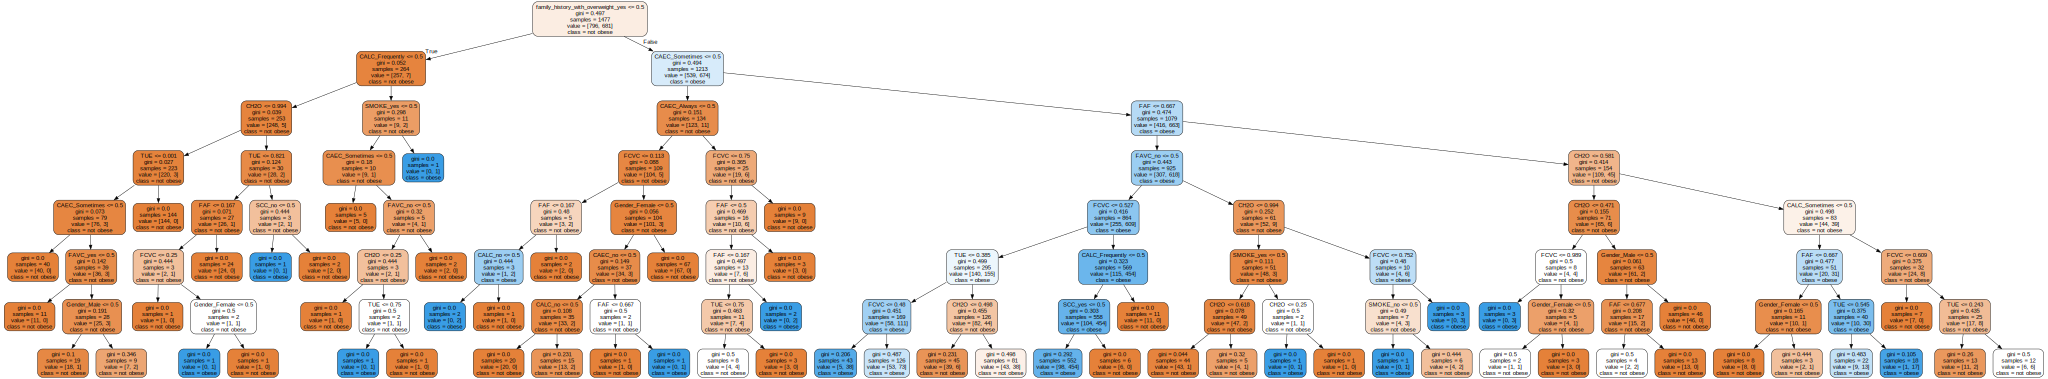

In [248]:
import graphviz 
from sklearn.tree import DecisionTreeClassifier, export_graphviz 

#Plotting the decision tree for the best estimator 
dot_data = export_graphviz(best, out_file =None,
               feature_names =X_dt.columns, #feature names from dataset
               filled=True, 
                rounded=True, 
                class_names = ['not obese','obese']) #classification labels 
               
graph=graphviz.Source(dot_data)
graph

In [249]:
graph.render("decision_tree", format='png', cleanup=True)


'decision_tree.png'

## Fairness assessment


## Conclusions + Future Work